# Photonic Lantern Parametric Simulation

In [2]:
# Import required libraries
import os
import sys
import subprocess
import numpy as np
import matplotlib.pyplot as plt

# Import custom modules
from rsoft_cad.lantern import ModeSelectiveLantern
from rsoft_cad.rsoft_simulations import run_simulation
from rsoft_cad.utils import visualise_lp_lantern
from rsoft_cad.utils import get_next_run_folder
from rsoft_cad.beamprop import beamprop_tapered_lantern

os.chdir("..")

## 1. Taper Length Exploration

In [2]:
expt_dir = get_next_run_folder("output", "beamprop_run_")
taper_length_array = np.linspace(
    20000,
    80000,
    200,
)

for i, taper_length in enumerate(taper_length_array):
    core_map = beamprop_tapered_lantern(
        expt_dir=expt_dir,
        opt_name=f"run_{i:03d}",
        taper_factor=18.75,
        taper_length=taper_length,
        highest_mode="LP02",
        launch_mode="LP02",
        result_files_prefix=f"run_{i:03d}",
    )

## 2. Visualise lantern configuration

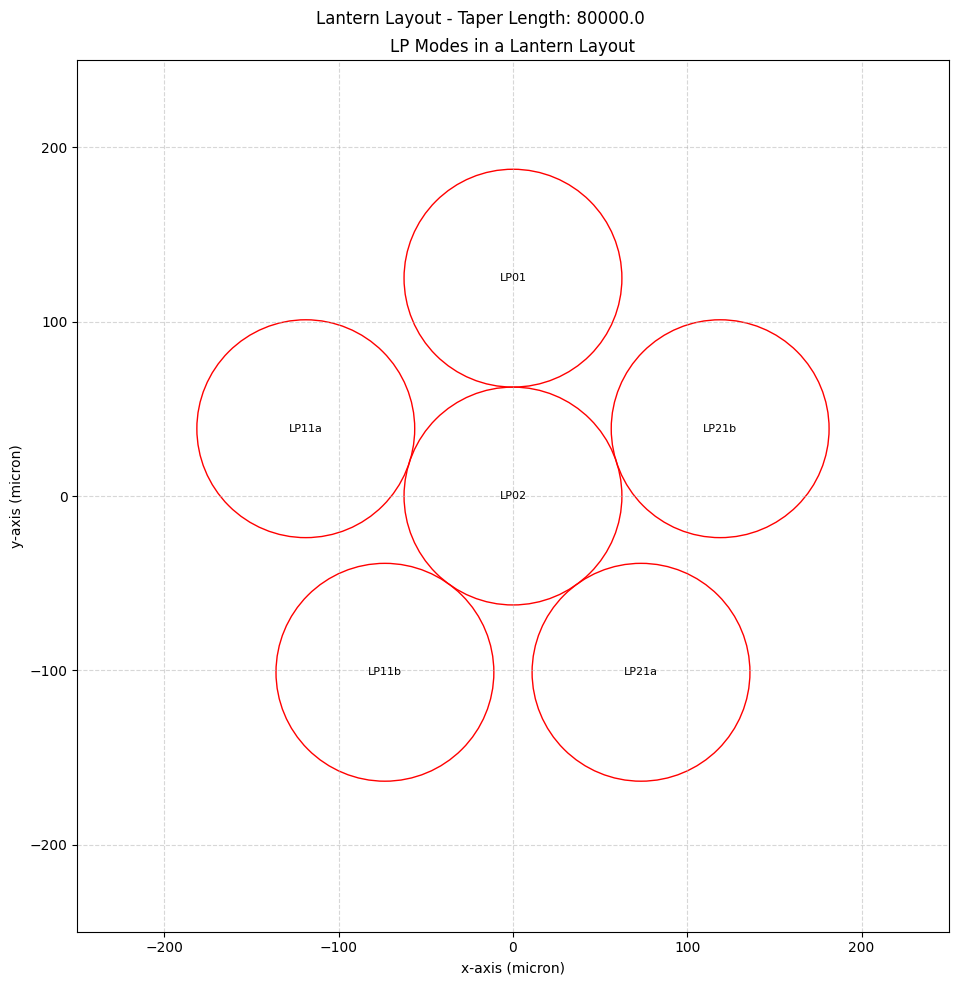

In [3]:
fig = visualise_lp_lantern(core_map)
plt.suptitle(f"Lantern Layout - Taper Length: {taper_length}")
plt.tight_layout()
plt.show()

## 3. Plotting it all together...

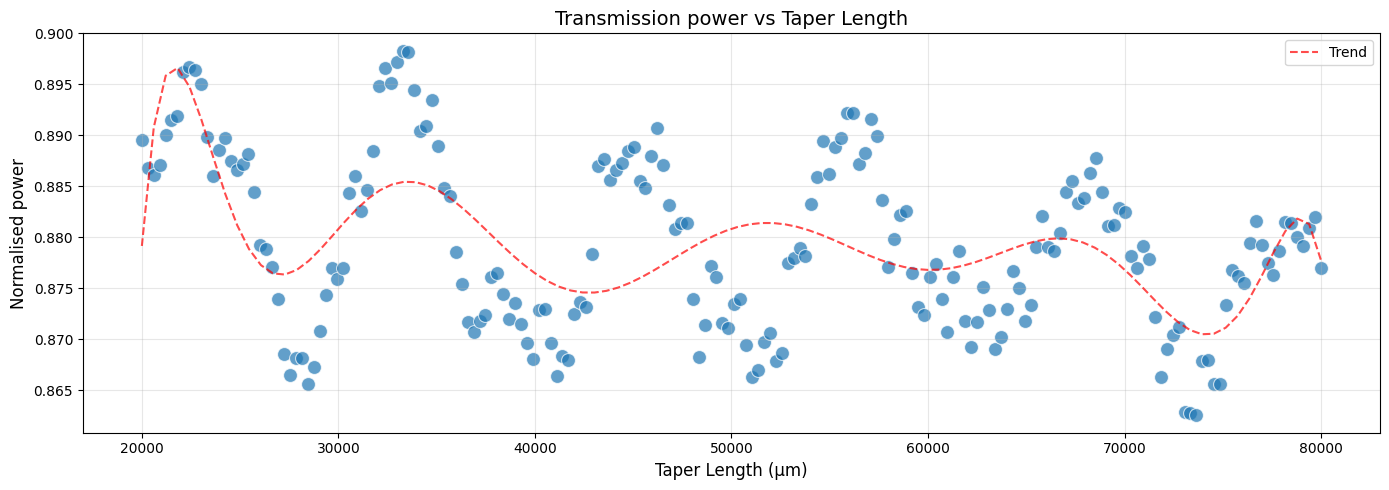

In [4]:
from rsoft_cad.beamprop import plot_combined_monitor_files

(
    fig,
    ax,
    combined_df,
    final_values,
    summary,
    optimal_taper,
    optimal_value,
) = plot_combined_monitor_files("output\\beamprop_run_003\\rsoft_data_files")

plt.show()